In [1]:
import cv2
import math
import matplotlib.pyplot as plt
import pandas as pd

from keras.preprocessing import image
import numpy as np
from keras.utils import np_utils
from skimage.transform import resize
from keras.models import Sequential
from keras.layers import Dense, Flatten,Dropout,Conv3D, MaxPooling3D,Activation
from keras.layers.convolutional import Convolution3D, MaxPooling3D
import os
from keras.models import model_from_json
import json
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
img_row = 100
img_col = 100
img_depth = 10

In [3]:
X_tr = []
listing = os.listdir('videofortraining/jump/')
for vid in listing:
    vid = 'videofortraining/jump/'+vid
    frames = []
    cap = cv2.VideoCapture(vid)
    frameRate = cap.get(7)/(img_depth - 1)
    newDimension = (img_row,img_col)
    
    frame_list = []
    frame_list.append(0)
    for i in range(img_depth):
        f = math.floor((i + 1) * frameRate)
        frame_list.append(f)
    frame_list.append(int(cap.get(7)-2))

    while (cap.isOpened()):
        frameId = cap.get(1)
        ret, frame = cap.read()
        if (ret != True):
            break
        if frameId in frame_list:
            frame = cv2.resize(frame, newDimension, interpolation = cv2.INTER_AREA)
            r, g, b = frame[:,:,0], frame[:,:,1], frame[:,:,2]
            gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
            frames.append(gray)
            
    cap.release()
    cv2.destroyAllWindows()

    input=np.array(frames)

    ipt=np.rollaxis(np.rollaxis(input,2,0),2,0)
    print(ipt.shape)

    X_tr.append(ipt)

(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100,

In [4]:
listing = os.listdir('videofortraining/walk/')
for vid in listing:
    vid = 'videofortraining/walk/'+vid
    frames = []
    cap = cv2.VideoCapture(vid)
    frameRate = cap.get(7)/(img_depth - 1)
    newDimension = (img_row,img_col)
    
    frame_list = []
    frame_list.append(0)
    for i in range(img_depth - 2):
        f = math.floor((i + 1) * frameRate)
        frame_list.append(f)
    frame_list.append(int(cap.get(7)-2))

    while (cap.isOpened()):
        frameId = cap.get(1)
        ret, frame = cap.read()
        if (ret != True):
            break
        if frameId in frame_list:
            frame = cv2.resize(frame, newDimension, interpolation = cv2.INTER_AREA)
            r, g, b = frame[:,:,0], frame[:,:,1], frame[:,:,2]
            gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
            frames.append(gray)
            
    cap.release()
    cv2.destroyAllWindows()

    input=np.array(frames)

    ipt=np.rollaxis(np.rollaxis(input,2,0),2,0)
    print(ipt.shape)

    X_tr.append(ipt)

(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100, 10)
(100, 100,

In [5]:
X_tr = np.array(X_tr)
print(X_tr.shape)

(300, 100, 100, 10)


In [6]:
num_sample = len(X_tr)

label = np.ones((num_sample))
label[0:150] = 0
label[150:300] = 1
print(label)

train_data = [X_tr,label]

(X_train,Y_train) = (train_data[0],train_data[1])

train_set = np.zeros((num_sample,1,img_row,img_col,img_depth))

for sample in range(num_sample):
    train_set[sample][0][:][:][:] = X_train[sample][:][:][:]

patch_size = 10
#print(train_set.shape)

batch_size = 2
num_class = 2
num_epoch = 50

Y_train = np_utils.to_categorical(Y_train,num_class)
#print(Y_train)

num_filter = [32,32]
num_pooling = [3,3]
num_conv = [5,5]

train_set = train_set.astype('float32')
train_set -= np.mean(train_set)
train_set /= np.max(train_set)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [7]:
model = Sequential()
model.add(Convolution3D(data_format = 'channels_first',filters = num_filter[0],kernel_size = (5,5,5),input_shape = (1,img_row,img_col,img_depth),activation='relu'))
model.add(MaxPooling3D(pool_size = [3,3,3]))
model.add(Dropout(0.5))
model.add(Flatten())

model.add(Dense(128,init = 'normal',activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(2,init = 'normal'))
model.add(Activation('softmax'))
model.compile(loss = 'categorical_crossentropy',optimizer = 'RMSprop',metrics = ['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


/home/jasongao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(128, activation="relu", kernel_initializer="normal")`
  import sys
/home/jasongao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(2, kernel_initializer="normal")`
  if __name__ == '__main__':


In [8]:
X_train_new,X_val_new,Y_train_new,Y_val_new = train_test_split(train_set,Y_train,test_size = 0.2)

In [44]:
hist = model.fit(X_train_new,Y_train_new,validation_data = (X_val_new,Y_val_new),batch_size = batch_size,nb_epoch = num_epoch,shuffle = True)

/home/jasongao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 240 samples, validate on 60 samples
Epoch 1/50
240/240 [==============================] - 66s 277ms/step - loss: 1.5075 - accuracy: 0.5125 - val_loss: 0.6865 - val_accuracy: 0.5000
Epoch 2/50
240/240 [==============================] - 66s 275ms/step - loss: 0.9586 - accuracy: 0.6583 - val_loss: 0.6266 - val_accuracy: 0.6833
Epoch 3/50
240/240 [==============================] - 66s 274ms/step - loss: 0.7959 - accuracy: 0.6458 - val_loss: 1.0179 - val_accuracy: 0.5667
Epoch 4/50
240/240 [==============================] - 67s 277ms/step - loss: 0.7487 - accuracy: 0.6750 - val_loss: 0.6473 - val_accuracy: 0.7500
Epoch 5/50
240/240 [==============================] - 84s 349ms/step - loss: 0.7405 - accuracy: 0.7000 - val_loss: 0.7077 - val_accuracy: 0.6167
Epoch 6/50
240/240 [==============================] - 86s 357ms/step - loss: 0.6936 - accuracy: 0.7292 - val_loss: 0.6541 - val_accuracy: 0.6667
Epoch 7/50
240/240 [==============================] - 85s 356ms/step - loss: 0.6565 -

In [60]:
model_json = model.to_json()
with open("model.json","w") as json_file:
    json_file.write(model_json)
    
model.save_weights("model_w.json")

In [9]:
json_file = open('model.json','r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights('model_w.json')
hist = loaded_model

In [10]:
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']
xc=range(num_epoch)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])


AttributeError: 'Sequential' object has no attribute 'history'

In [11]:
X_TEST = []
frames = []
count = 0
listing = os.listdir('video_filmed/')
for vid in listing:
    vid = 'video_filmed/'+vid
    frames = []
    cap = cv2.VideoCapture(vid)
    frameRate = round(cap.get(5))
    num_frame = round(cap.get(7))
    print(frameRate)
    print(num_frame)
    
    newDimension = (img_row,img_col)
    sample_rate = 0.2 * frameRate 
    
    s = 0
    sample_frame = []
    sample_frame.append(0)
    while (s <= num_frame - 1 - img_depth * sample_rate):
        s += sample_rate 
        sample_frame.append(s)
    
    print(sample_frame)

    while (cap.isOpened()):
        frameId = cap.get(1)
        ret, frame = cap.read()
        if (ret != True):
            break
        if frameId in sample_frame:
            frame = cv2.resize(frame, newDimension, interpolation = cv2.INTER_AREA)
            r, g, b = frame[:,:,0], frame[:,:,1], frame[:,:,2]
            gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
            frames.append(gray)
            count +=1
            
    cap.release()
    cv2.destroyAllWindows()
    
    frames = np.array(frames)

    print(frames.shape)
    
   
    
    for i in range(count-img_depth):
        frame_pack = []
        for j in range(img_depth):
            frame_pack.append(frames[i+j][:][:])    
        X_TEST.append(frame_pack)  
        
       #f = np.array(frame_pack)
       #print(f.shape)
    
    X_TEST = np.array(X_TEST)
    X_TEST = np.rollaxis(np.rollaxis(X_TEST,3,1),3,1)
    print(X_TEST.shape)
    
    TEST_set = np.zeros((count-img_depth,1,img_row,img_col,img_depth))

    for sample in range(count-img_depth):
        TEST_set[sample][0][:][:][:] = X_TEST[sample][:][:][:]


30
286
[0, 6.0, 12.0, 18.0, 24.0, 30.0, 36.0, 42.0, 48.0, 54.0, 60.0, 66.0, 72.0, 78.0, 84.0, 90.0, 96.0, 102.0, 108.0, 114.0, 120.0, 126.0, 132.0, 138.0, 144.0, 150.0, 156.0, 162.0, 168.0, 174.0, 180.0, 186.0, 192.0, 198.0, 204.0, 210.0, 216.0, 222.0, 228.0]
(39, 100, 100)
(29, 100, 100, 10)


In [12]:
prediction = hist.predict_proba(TEST_set)
time = []
prob = []
time_label = []
for i in range(count-img_depth):
    time.append(i*0.2)
    prob.append(prediction[i][0])
    time_label.append([i*0.2,prediction[i][0]])

#time_label = np.array(time_label)



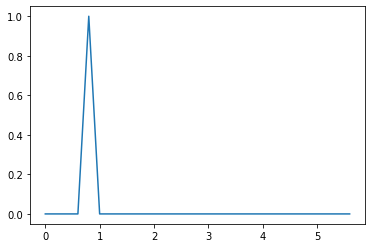

In [13]:
plt.plot(time,prob)

In [15]:
with open('time_label_1','w') as f:
    json.dump(str(time_label),f)